# **Bank Marketing Analysis**

# **Import libraries**

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [8]:
bank_data = pd.read_csv(r'D:\RATHNA\FITA ACADEMY\Practice\bank.csv')

In [10]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
bank_data.shape

(45211, 17)

In [16]:
bank_data.describe

<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact 

In [18]:
bank_data = bank_data.rename(columns={'y': 'deposit'})

In [20]:
bank_data['deposit'].value_counts()

deposit
no     39922
yes     5289
Name: count, dtype: int64

In [22]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [24]:
bank_data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
deposit         2
dtype: int64

In [224]:
categorical_columns = bank_data.select_dtypes(include=['object']).columns
numerical_columns = bank_data.select_dtypes(exclude=['object']).columns

In [226]:
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [228]:
bank_category = bank_data.select_dtypes('object')
for col in bank_category.columns:
  print(bank_data[[col]].value_counts())
  print('')

job          
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital 
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default
no         44396
yes          815
Name: count, dtype: int64

housing
yes        25130
no         20081
Name: count, dtype: int64

loan
no      37967
yes      7244
Name: count, dtype: int64

contact  
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month
may      13766
jul       6895
aug       6247
jun       5341
nov       3970
apr       2932
feb       2649
jan       1403
oct        738
sep        579
mar        477
dec        214
Name: count, d

# ****Client Demographics****

In [48]:
bank_data["age"].value_counts()

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

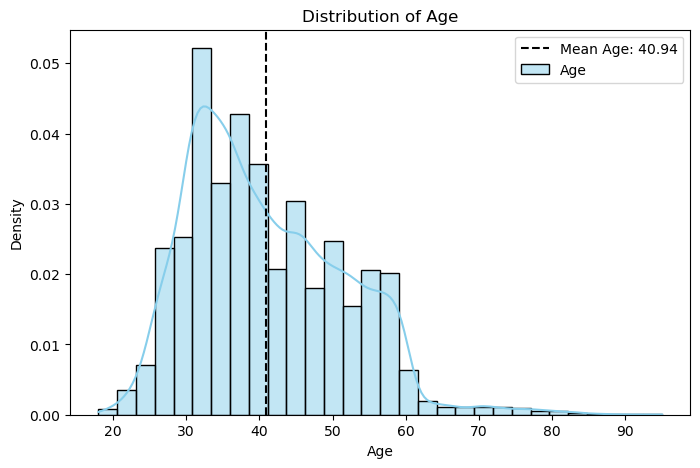

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(bank_data['age'], bins=30, kde=True, color='skyblue', stat="density", label='Age')
plt.axvline(x=bank_data['age'].mean(), color='k', linestyle="--", label='Mean Age: {}'.format(round(bank_data['age'].mean(), 2)))
plt.legend()
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19364\3518536668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='job', y='age', data=bank_data, palette='Set2')


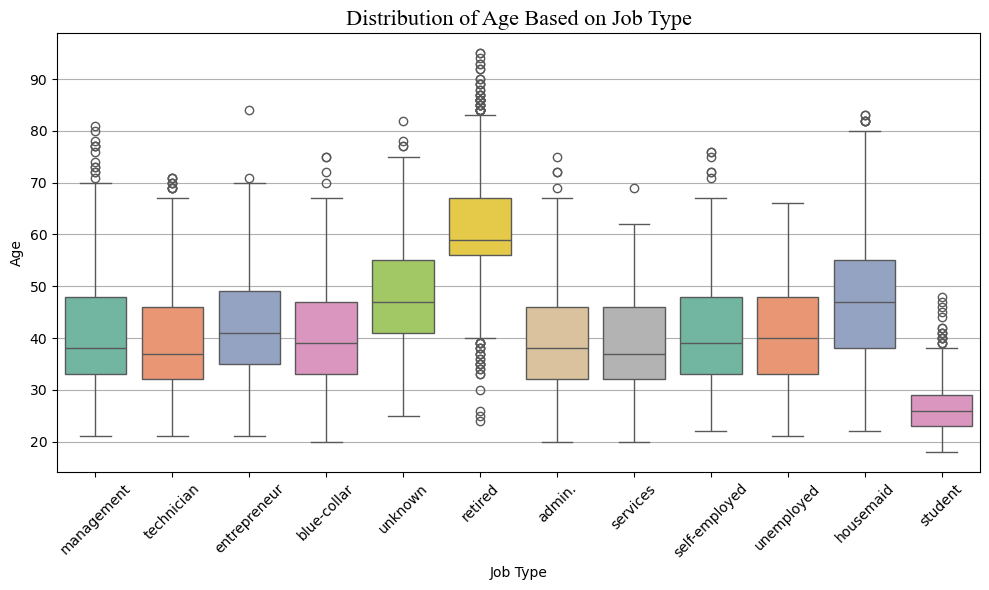

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='job', y='age', data=bank_data, palette='Set2')
plt.title('Distribution of Age Based on Job Type', fontsize=16, fontfamily="Times New Roman")
plt.xlabel('Job Type')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19364\3841742458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, x='marital', y='age',palette=['HotPink', 'LightSeaGreen', 'SlateBlue'])


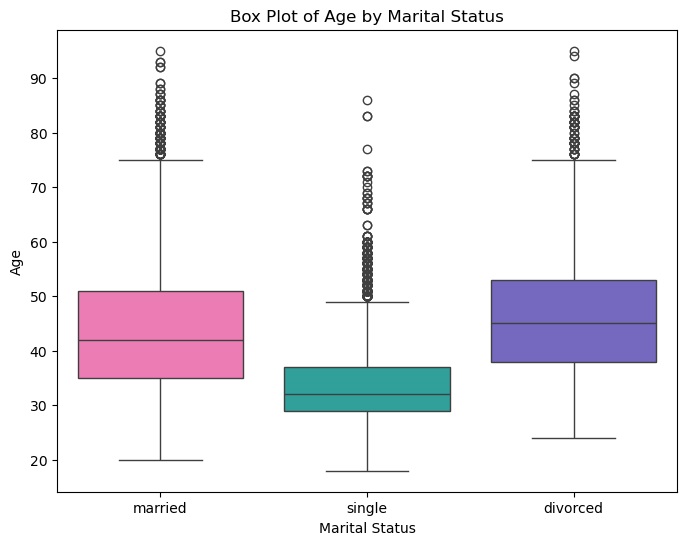

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=bank_data, x='marital', y='age',palette=['HotPink', 'LightSeaGreen', 'SlateBlue'])
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Box Plot of Age by Marital Status')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19364\464233636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='housing', y='age', data=bank_data, palette='Set2')


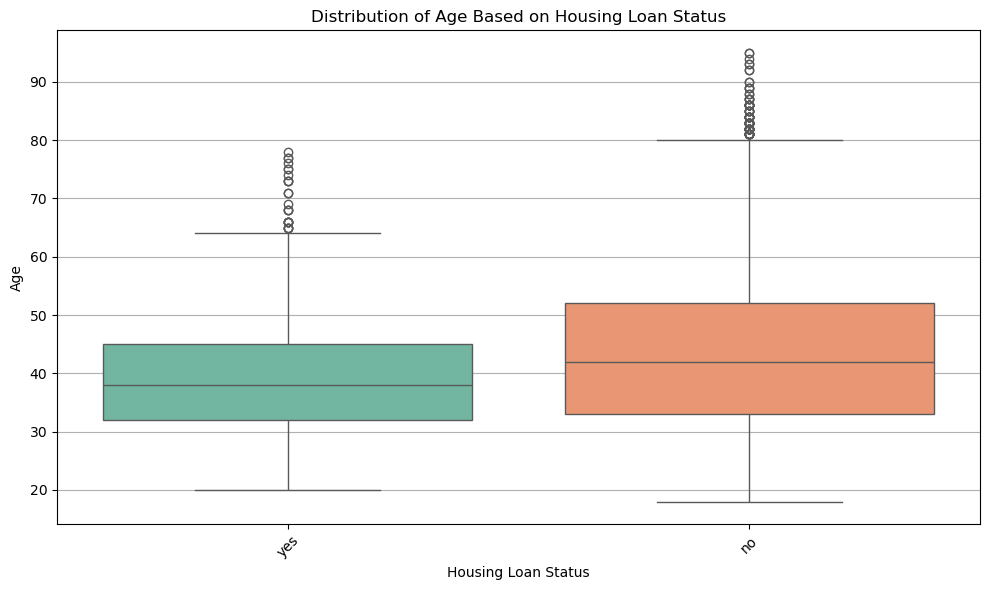

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='housing', y='age', data=bank_data, palette='Set2')
plt.title('Distribution of Age Based on Housing Loan Status')
plt.xlabel('Housing Loan Status')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# ****Employment Influence****

In [60]:
bank_data.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_19364\2555526027.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.boxplot(x= bank_data['job'] ,y=bank_data['age'] ,hue =bank_data['deposit'] ,color ='r')


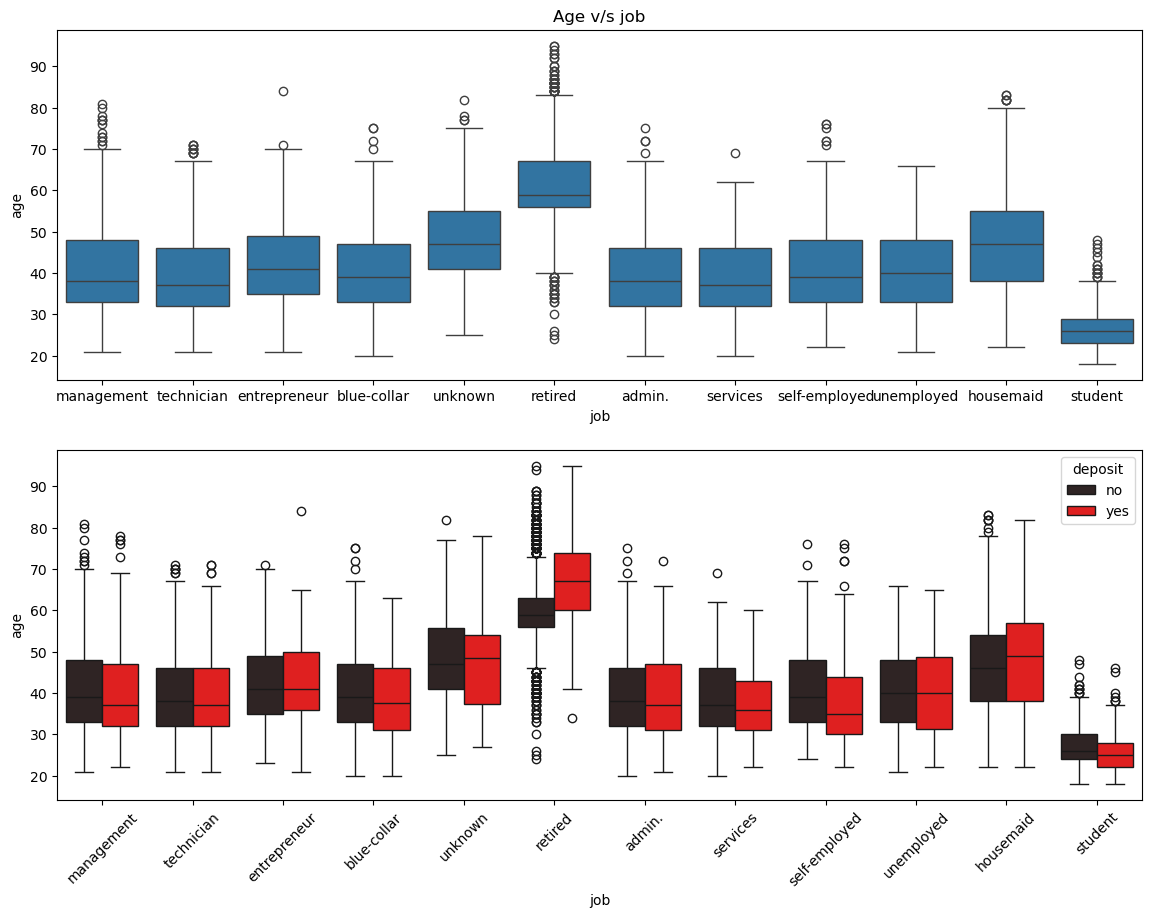

In [62]:
plt.figure(figsize =(14,10))
plt.subplot(2,1,1)
sns.boxplot(x= bank_data['job'] ,y=bank_data['age'])
plt.title('Age v/s job')
plt.subplot(2,1,2)
sns.boxplot(x= bank_data['job'] ,y=bank_data['age'] ,hue =bank_data['deposit'] ,color ='r')
plt.xticks(rotation=45)  
plt.show()


# **Marital Status**

In [71]:
marital_counts = bank_data['marital'].value_counts()

In [73]:
marital_counts 

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

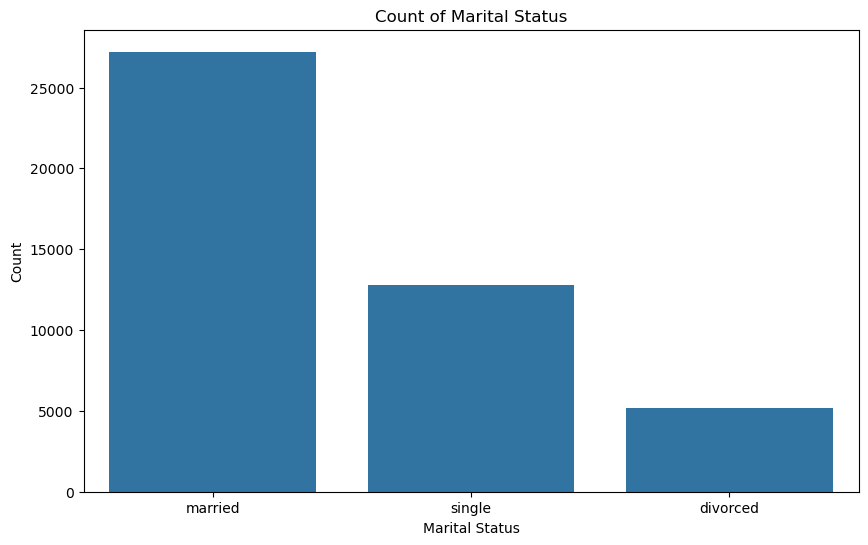

In [83]:
 plt.figure(figsize=(10, 6))
sns.countplot(x="marital", data=bank_data)
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

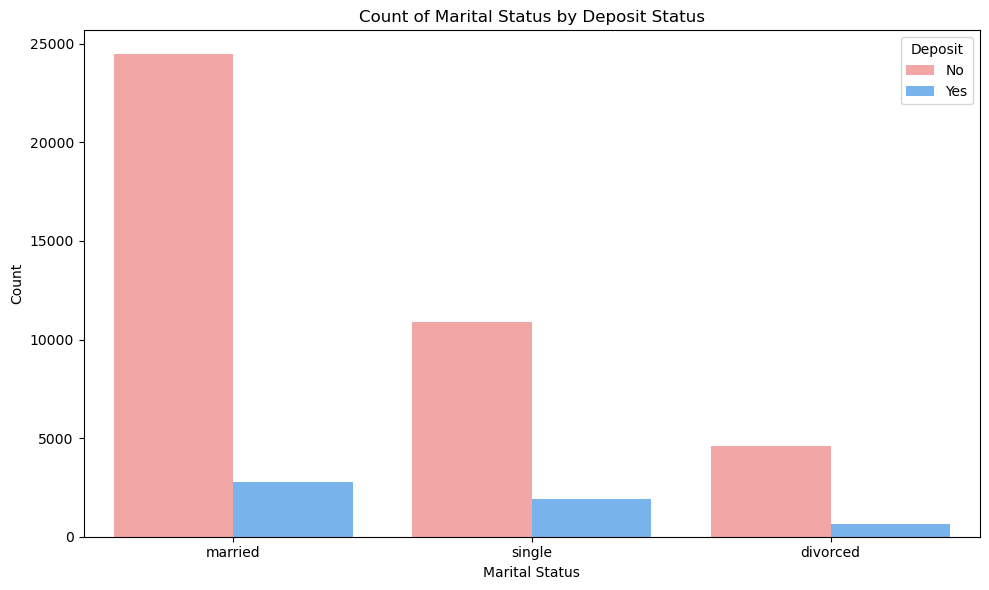

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(x="marital", data=bank_data, hue="deposit", palette=["#FF9999", "#66B3FF"])
plt.title('Count of Marital Status by Deposit Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Deposit', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# ****Financial Health****

In [119]:
bank_data.balance.value_counts()

balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7168, dtype: int64

In [115]:
bank_data[bank_data['balance']==bank_data.balance.max()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,-1,0,unknown,no


In [117]:
bank_data[bank_data['balance']==bank_data.balance.min()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
12909,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no


# **Credit and Housing**

In [131]:
counts=bank_data["loan"].value_counts()
counts

loan
no     37967
yes     7244
Name: count, dtype: int64

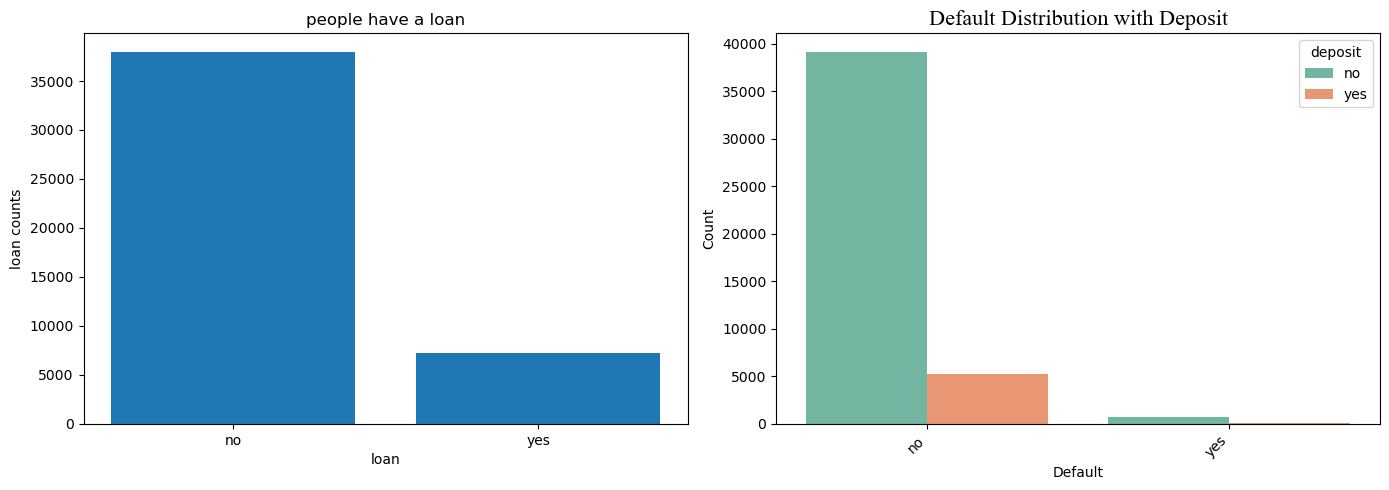

In [137]:
plt.figure(figsize =(14 ,5))
plt.subplot(1, 2, 1)
plt.bar(['no','yes'] ,counts)
plt.xlabel("loan")
plt.ylabel("loan counts")
plt.title("people have a loan")


plt.subplot(1, 2, 2)
sns.countplot(x='default', data=bank_data, hue='deposit', palette='Set2')  # Use original data
plt.title('Default Distribution with Deposit', fontsize=16, fontfamily='Times New Roman', loc='center')
plt.xlabel('Default')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [143]:
house_counts = bank_data["housing"].value_counts()
house_counts

housing
yes    25130
no     20081
Name: count, dtype: int64

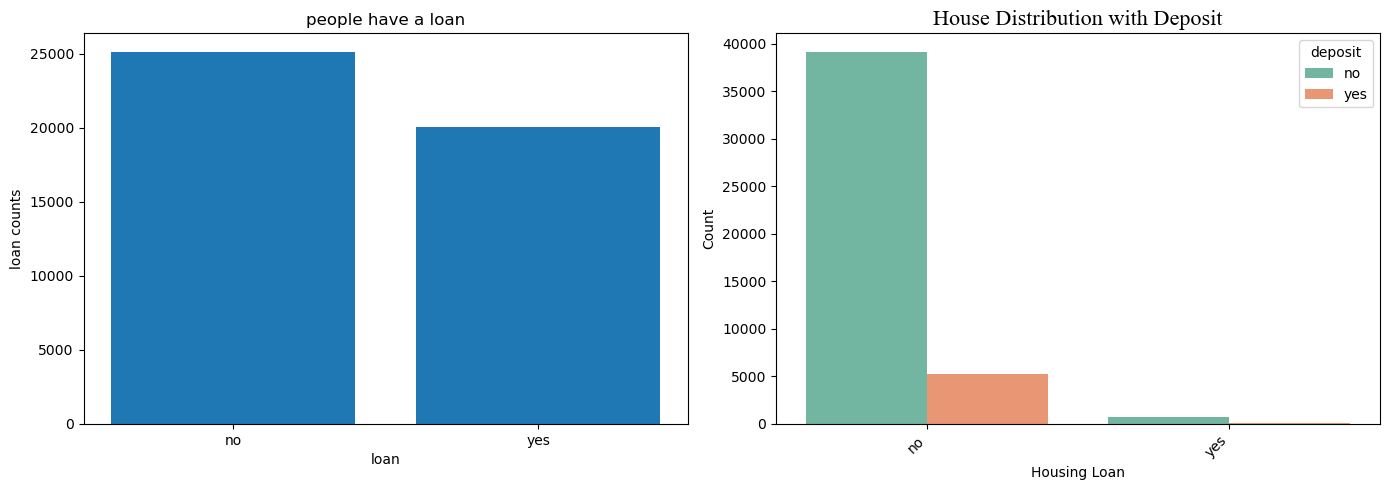

In [145]:
plt.figure(figsize =(14 ,5))
plt.subplot(1, 2, 1)
plt.bar(['no','yes'] ,house_counts)
plt.xlabel("loan")
plt.ylabel("loan counts")
plt.title("people have a loan")


plt.subplot(1, 2, 2)
sns.countplot(x='default', data=bank_data, hue='deposit', palette='Set2')  # Use original data
plt.title('House Distribution with Deposit', fontsize=16, fontfamily='Times New Roman', loc='center')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [147]:
personal_counts = bank_data["housing"].value_counts()
personal_counts

housing
yes    25130
no     20081
Name: count, dtype: int64

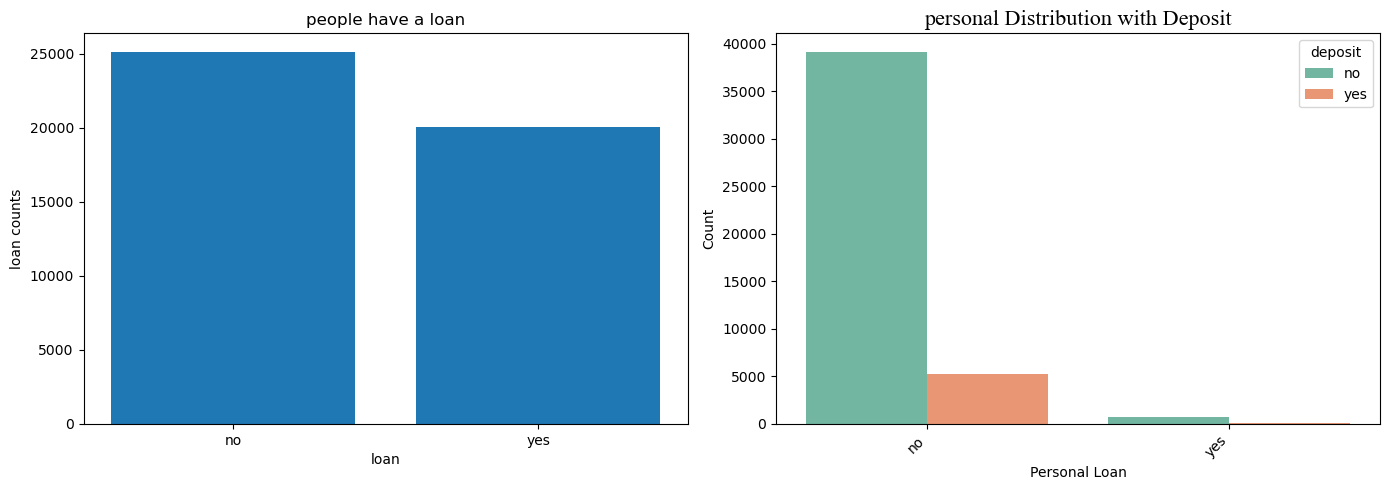

In [149]:
plt.figure(figsize =(14 ,5))
plt.subplot(1, 2, 1)
plt.bar(['no','yes'] ,personal_counts)
plt.xlabel("loan")
plt.ylabel("loan counts")
plt.title("people have a loan")


plt.subplot(1, 2, 2)
sns.countplot(x='default', data=bank_data, hue='deposit', palette='Set2')  # Use original data
plt.title('personal Distribution with Deposit', fontsize=16, fontfamily='Times New Roman', loc='center')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ****Impact of Education****

In [87]:
bank_data.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [93]:
education_counts = bank_data['education'].value_counts().reset_index()
education_counts.columns = ['Education', 'Count'] 

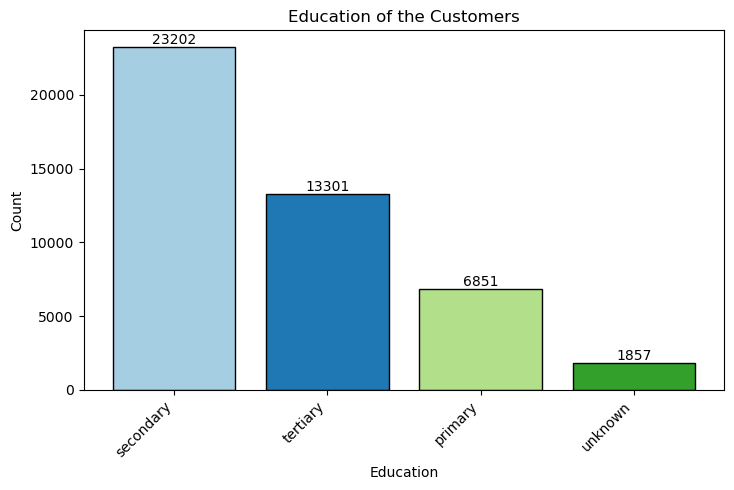

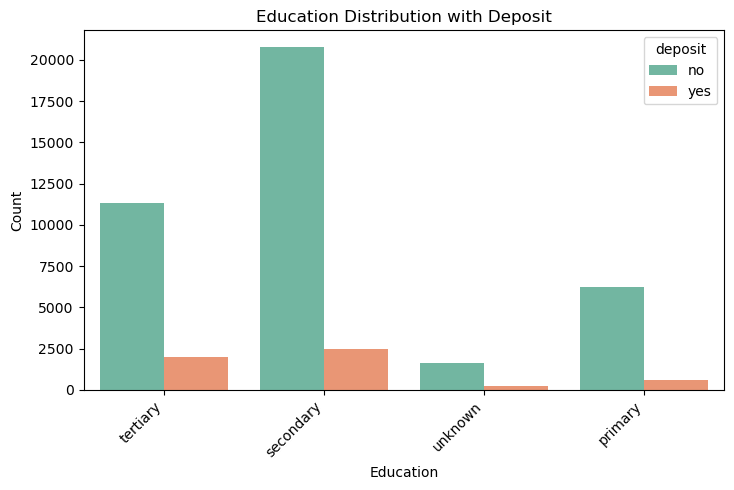

In [155]:


plt.figure(figsize =(14 ,5))
plt.subplot(1 ,2,1)
bars = plt.bar(education_counts['Education'], education_counts['Count'], color=plt.cm.Paired(range(len(education_counts))), edgecolor='black')
plt.bar_label(bars, label_type='edge')
plt.title('Education of the Customers')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

plt.figure(figsize =(14 ,5))
plt.subplot(1, 2, 2)
sns.countplot(x='education', data=bank_data, hue='deposit', palette='Set2') 
plt.title('Education Distribution with Deposit')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Contact Methods**

In [157]:
bank_data.contact.value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

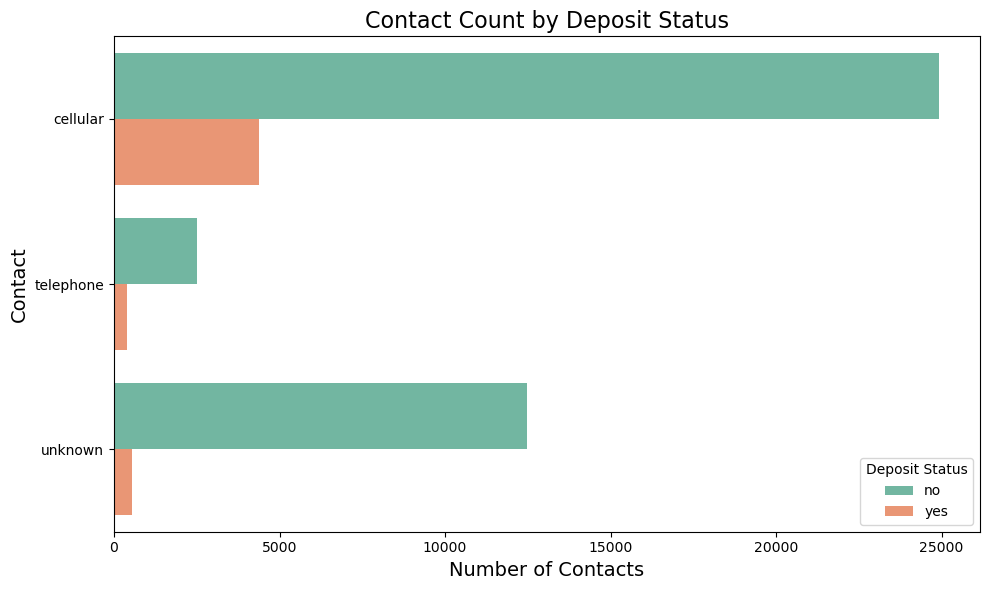

In [193]:
deposit_counts = bank_data.groupby(['contact', 'deposit']).size().reset_index(name='Count')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='contact', hue='deposit', data=deposit_counts, palette='Set2')

# Adding title and labels
plt.title('Contact Count by Deposit Status', fontsize=16)
plt.xlabel('Number of Contacts', fontsize=14)
plt.ylabel('Contact', fontsize=14)

# Adding legend
plt.legend(title='Deposit Status')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# **Marketing Campaign**

In [169]:
bank_data.campaign.value_counts()

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64

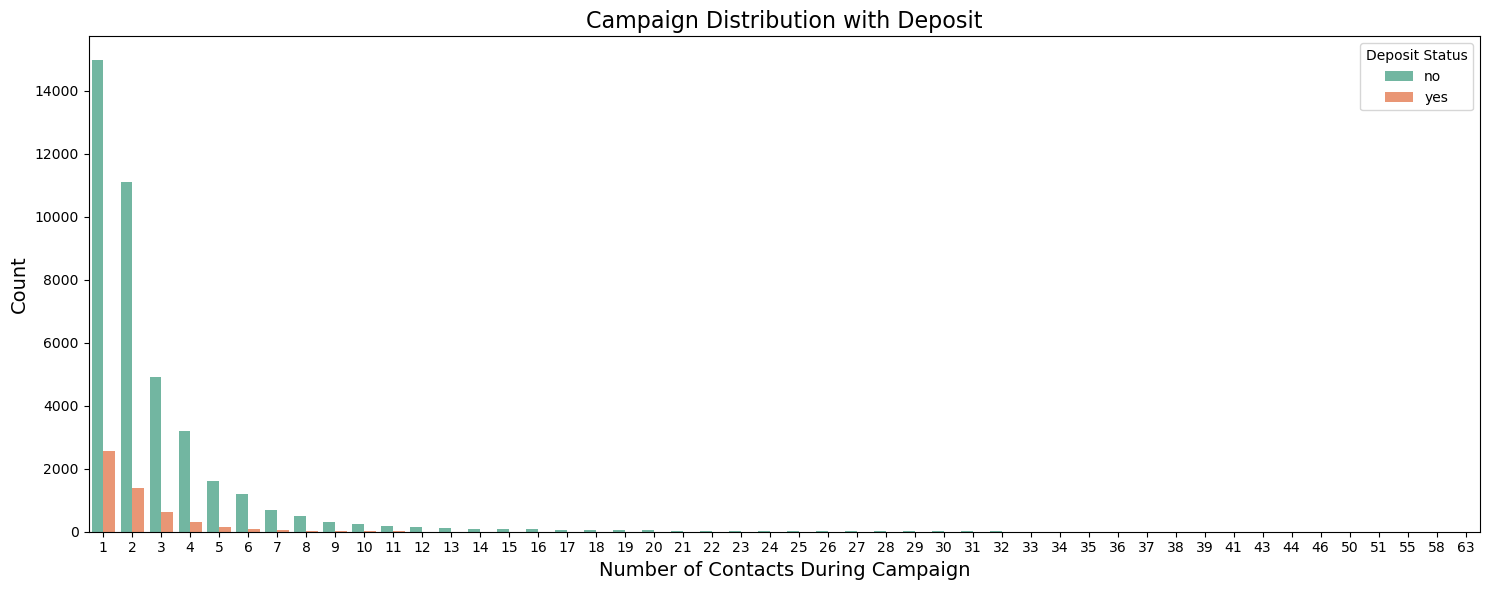

In [173]:
plt.figure(figsize=(15, 6))
sns.countplot(x='campaign', data=bank_data, hue='deposit', palette='Set2')
plt.title('Campaign Distribution with Deposit', fontsize=16)
plt.xlabel('Number of Contacts During Campaign', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Deposit Status')
plt.tight_layout()
plt.show()

# **Duration of Contacts**

In [161]:
bank_data["duration"].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

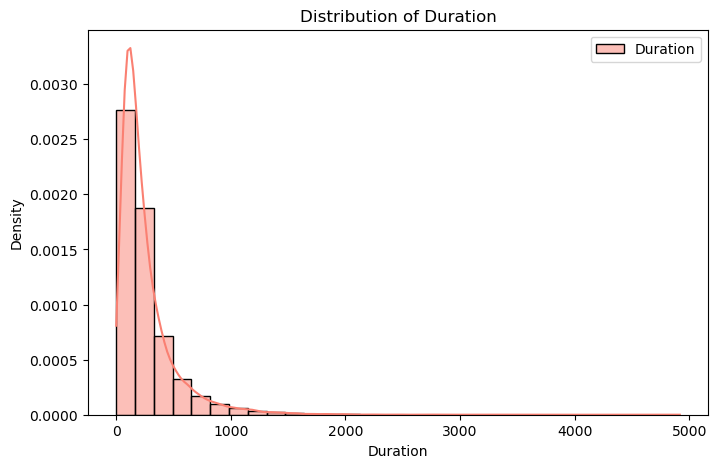

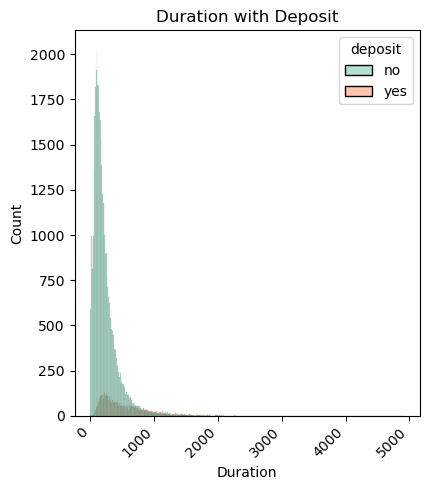

In [167]:
plt.figure(figsize=(8, 5))
sns.histplot(bank_data['duration'], bins=30, kde=True, color='salmon', stat="density", label='Duration')
plt.legend()
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 2)
sns.histplot(x='duration', data=bank_data, hue='deposit', palette='Set2') 
plt.title('Duration with Deposit')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Previous Campaign Outcomes**

In [175]:
bank_data["poutcome"].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

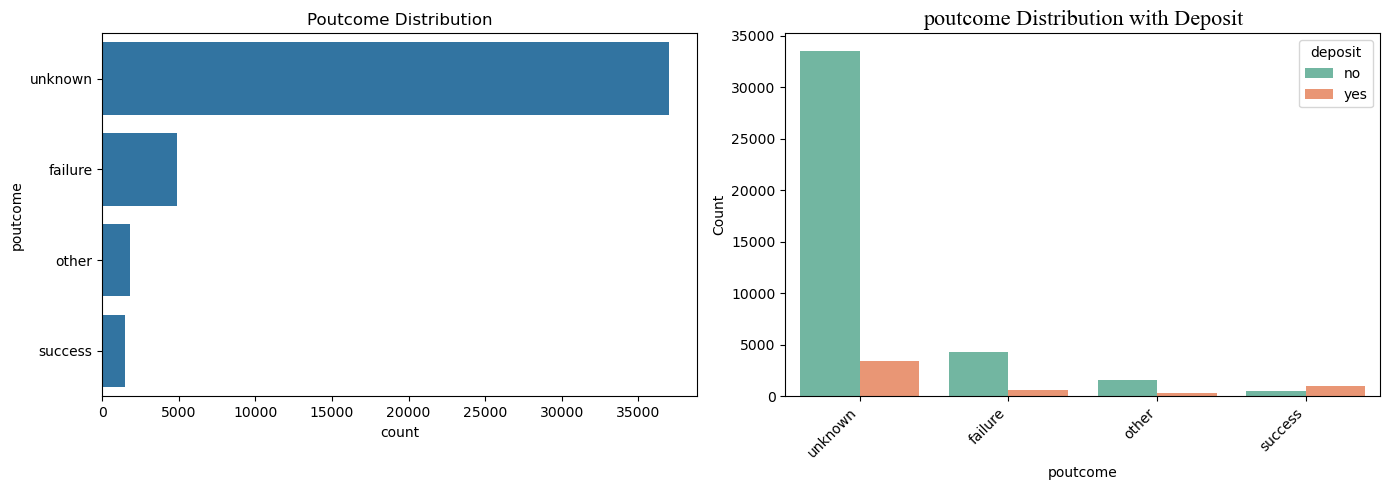

In [182]:
plt.figure(figsize =(14 ,5))
plt.subplot(1 ,2,1)
plt.title('Poutcome Distribution')
sns.countplot(bank_data['poutcome'])


plt.subplot(1, 2, 2)
sns.countplot(x='poutcome', data=bank_data, hue='deposit', palette='Set2') 
plt.title('poutcome Distribution with Deposit', fontsize=16, fontfamily='Times New Roman', loc='center')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Month and day**

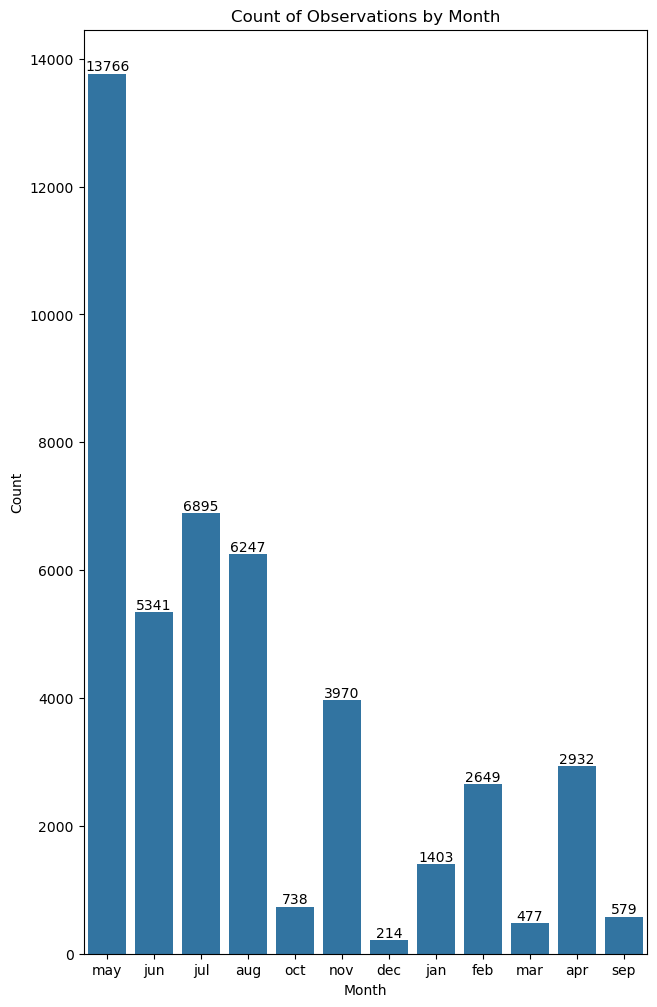

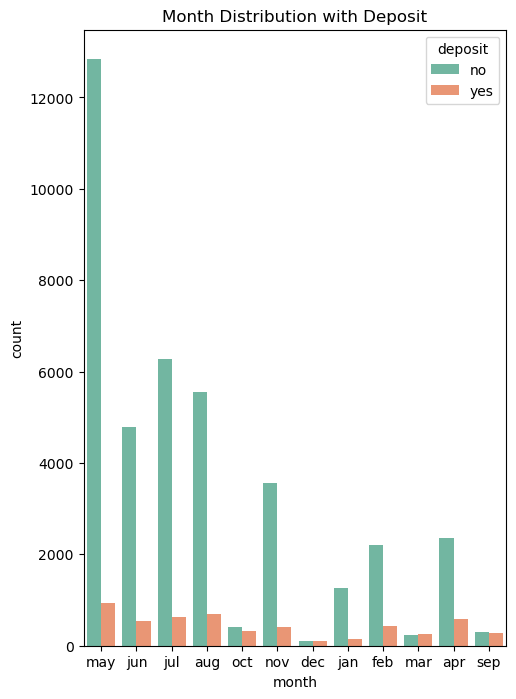

In [206]:

plt.figure(figsize=(16,12))
plt.subplot(1 ,2,1)
ax = sns.countplot(data=bank_data, x='month')
plt.title('Count of Observations by Month')
plt.xlabel('Month')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])  
plt.show()
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 2)
sns.countplot(x='month', data=bank_data, hue='deposit', palette='Set2') 
plt.title('Month Distribution with Deposit')
plt.show()

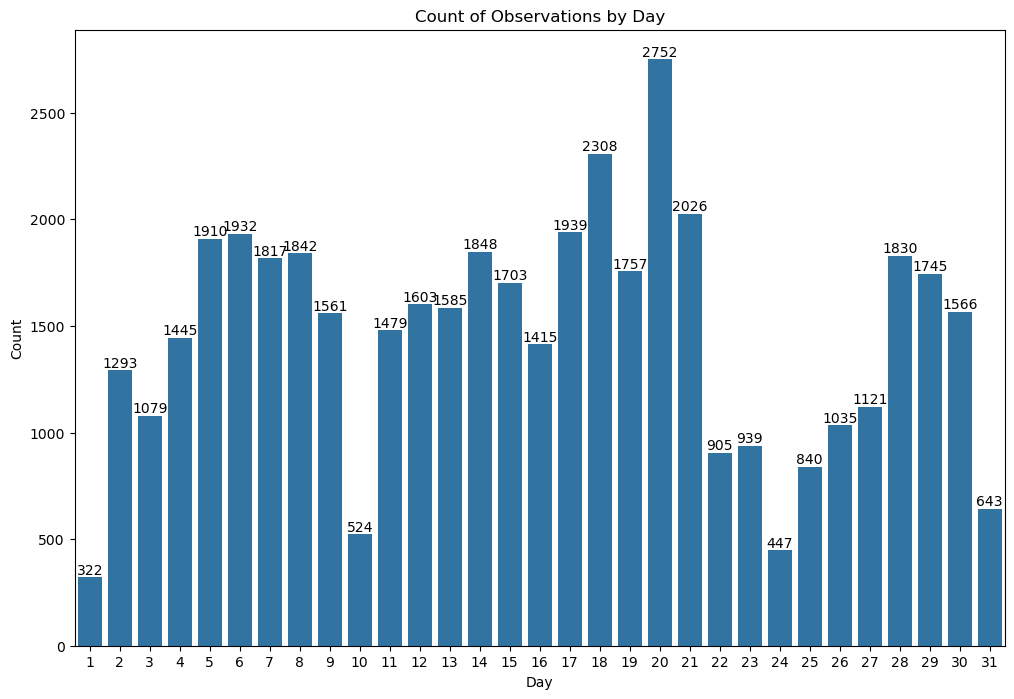

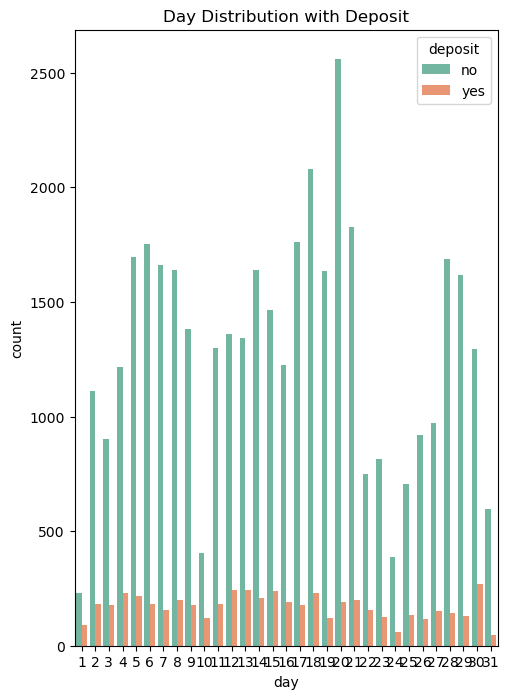

In [208]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(data=bank_data, x='day')
plt.title('Count of Observations by Day')
plt.xlabel('Day')
plt.ylabel('Count')
counts = bank_data['day'].value_counts()
ax.bar_label(ax.containers[0]) 
plt.show()

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 2)
sns.countplot(x='day', data=bank_data, hue='deposit', palette='Set2') 
plt.title('Day Distribution with Deposit')
plt.show()

In [354]:
bank_data = pd.read_csv(r'D:\RATHNA\FITA ACADEMY\Practice\bank.csv')

In [356]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [360]:
print(bank_data['y'].dtype)

object


In [362]:
bank_data = bank_data.rename(columns={'y': 'deposit'})

In [364]:
bank_data['deposit'].value_counts()

deposit
no     39922
yes     5289
Name: count, dtype: int64

In [368]:


# Now map the values to 1 and 0
bank_data['deposit'] = bank_data['deposit'].map({'yes': 1, 'no': 0})


In [370]:
print(bank_data['deposit'].isnull().sum())

0


In [374]:
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [378]:
df_encoded = pd.get_dummies(bank_data, columns=categorical_columns, drop_first=True)

In [380]:
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']


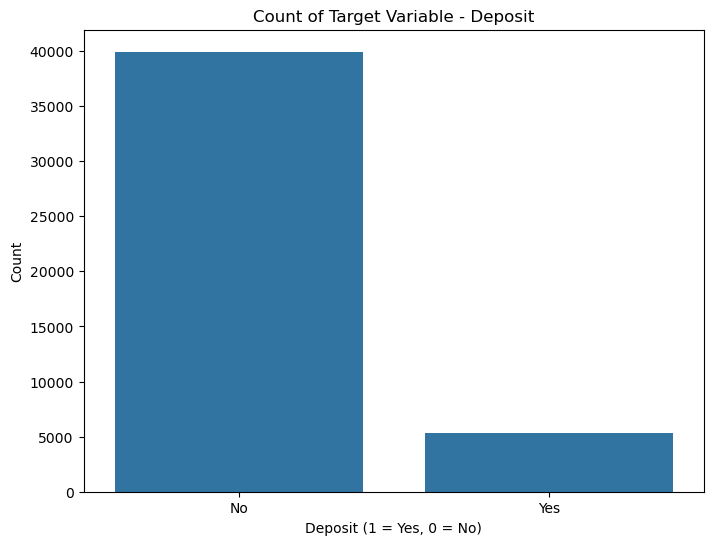

In [382]:
plt.figure(figsize=(8, 6))
sns.countplot(x='deposit', data=df_encoded)
plt.title('Count of Target Variable - Deposit')
plt.xlabel('Deposit (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [390]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [391]:
y_pred = model.predict(X_test)

In [394]:

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy of Logistic Regression model:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Accuracy of Logistic Regression model: 0.9005860886873825

Confusion Matrix:
 [[7780  205]
 [ 694  364]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.64      0.34      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [396]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [398]:
#predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:0.88
Confusion Matrix:
 [[7408  577]
 [ 530  528]]


In [400]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [402]:
# Predict on the test set
y_pred = classifier.predict(X_test)

In [408]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)



Confusion Matrix:
[[7797  188]
 [ 719  339]]


In [410]:
# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.64      0.32      0.43      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [412]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


In [414]:
# Initialize and train the Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [416]:
# Predict on the test set
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.63      0.31      0.42      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [418]:
#Initalize and train the random forest classifier 
rf_classifier = RandomForestClassifier(n_estimators=2, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=42)

In [420]:
#predict and evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy:.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:0.89
Confusion Matrix:
 [[7813  172]
 [ 808  250]]


In [422]:
classifier = RandomForestClassifier(criterion='gini', max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [424]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.89
Confusion Matrix:
[[7981    4]
 [1032   26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7985
           1       0.87      0.02      0.05      1058

    accuracy                           0.89      9043
   macro avg       0.88      0.51      0.49      9043
weighted avg       0.88      0.89      0.83      9043



In [426]:
classifier = RandomForestClassifier(criterion='entropy', max_depth=4, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, random_state=42)

In [428]:
# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.89
Confusion Matrix:
[[7980    5]
 [1021   37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7985
           1       0.88      0.03      0.07      1058

    accuracy                           0.89      9043
   macro avg       0.88      0.52      0.50      9043
weighted avg       0.89      0.89      0.84      9043



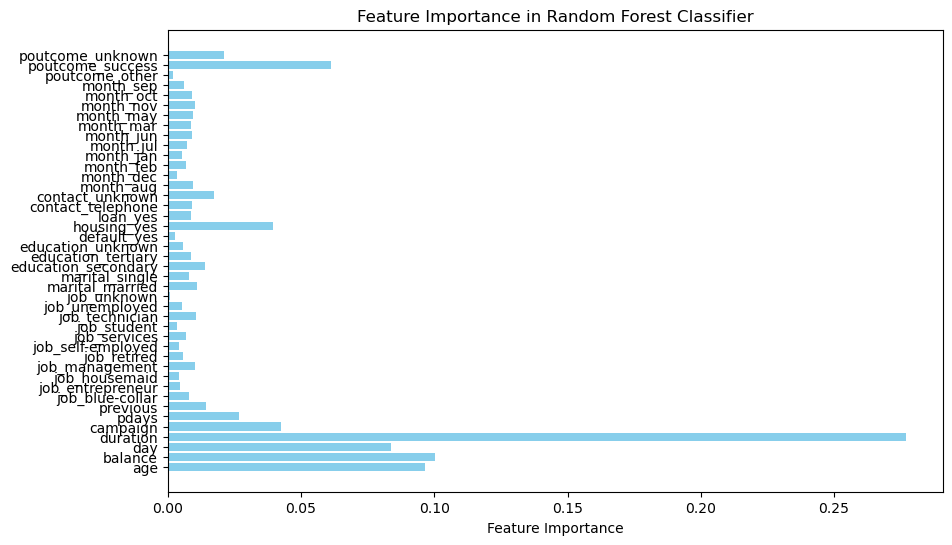

In [432]:
# Feature importances from the Random Forest classifier
feature_importances = rf_classifier.feature_importances_
features = X.columns

# Create a horizontal bar plot for feature importances
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed (width, height)
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest Classifier")
plt.show()